In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
plt.style.use(['fivethirtyeight','ggplot'])
#import nltk
#nltk.download()

In [2]:
# Twitter API Credentials
APIKey='2mdoO08CiDVRFXUp3DJKyyONH'
APISecreatKey='Z3jmDmTOvr9PlMt2rcD3ra5rgNY1vciKr6CecpgolLIgyreZAW'
AccessToken='1263472314135523328-PUOjgN9HWxMCMMIPokrCwrfSPPYxoK'
AccessTokenSecreat='RGrWzboiQpgauKTYK2HpijOxhXj6K1aJdSEXjP3G8m32Z'

In [3]:
# Create Authentication Object
authenticate = tweepy.OAuthHandler(APIKey,APISecreatKey)
authenticate.set_access_token(AccessToken,AccessTokenSecreat)
api = tweepy.API(authenticate)

In [5]:
posts = api.user_timeline(screen_name='Trump',count=100,lang='en',tweet_mode='extended')
i=1
for tweet in posts[:10]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i=i+1

1)Find Dad’s favorite gift on @TrumpStore’s Father's Day Gift Guide. Last chance for expedited shipping—order today at https://t.co/GYcOona8CS! https://t.co/NJrW7mCDLA

2)Celebrate the Stars and Stripes with @TrumpHotels Flag Day sale! Today only, enjoy 30% savings on stays at any of our U.S. destinations through December 31st. Use code FLAGDAY to book: https://t.co/jKKX6AkwAw. https://t.co/rBWCCJoA9Z

3)Pairing #NationalRoséDay with the perfect accessory: @TrumpStore’s Riedel wine glasses. Shop the full Rosé Day collection at https://t.co/x5l4W4Igym. https://t.co/1OUuHAlnIe

4)We’ll never tire of @TrumpTurnberry’s legendary lighthouse views. 

📷: James GoldenBoy https://t.co/TwBLi6pZZE

5)RT @TrumpHotels: Don't miss out on our next offer! Join our mailing list to stay up to date on #TrumpHotels exclusive offers, promotions, a…

6)Escape to enchanting @TrumpDoonbeg for an unmatched travel experience. 

Our @TrumpHotels #NeverSettleSummer offer features a dining credit and your choice o

In [6]:
# Create a dataframe with column name Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df

,Tweets
0,Find Dad’s favorite gift on @TrumpStore’s Fath...
1,Celebrate the Stars and Stripes with @TrumpHot...
2,Pairing #NationalRoséDay with the perfect acce...
3,We’ll never tire of @TrumpTurnberry’s legendar...
4,RT @TrumpHotels: Don't miss out on our next of...
...,...
95,RT @TrumpGolf: Hosting the Great One @WayneGre...
96,Last chance to take advantage of the Suitest D...
97,Bring the World of Trump home with you this Ch...
98,RT @TrumpHotels: Don't miss out on a legendary...


In [7]:
# Make a function to clean a tweets
def clean_text(text):
    text=re.sub('[^a-zA-Z]',' ',text)
    text=re.sub('RT[\s]+','',text)#Removing Retweets
    text=re.sub('https?:\/\/\s+','',text)#Removing links
    return text

In [8]:
df['Tweets']=df['Tweets'].apply(clean_text)

In [9]:
df

,Tweets
0,Find Dad s favorite gift on TrumpStore s Fath...
1,Celebrate the Stars and Stripes with TrumpHot...
2,Pairing NationalRos Day with the perfect acce...
3,We ll never tire of TrumpTurnberry s legendar...
4,TrumpHotels Don t miss out on our next offer ...
...,...
95,TrumpGolf Hosting the Great One WayneGretzky...
96,Last chance to take advantage of the Suitest D...
97,Bring the World of Trump home with you this Ch...
98,TrumpHotels Don t miss out on a legendary gol...


In [10]:
# Create a function to get subjectivity of all tweets
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity of all tweets
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

# Create 2 columns 'subjectivity' and 'polarity'
df['subjectivity']=df['Tweets'].apply(getsubjectivity)
df['polarity']=df['Tweets'].apply(getpolarity)

In [11]:
df

,Tweets,subjectivity,polarity
0,Find Dad s favorite gift on TrumpStore s Fath...,0.533333,0.250000
1,Celebrate the Stars and Stripes with TrumpHot...,0.750000,0.200000
2,Pairing NationalRos Day with the perfect acce...,0.775000,0.675000
3,We ll never tire of TrumpTurnberry s legendar...,1.000000,1.000000
4,TrumpHotels Don t miss out on our next offer ...,0.000000,0.050000
...,...,...,...
95,TrumpGolf Hosting the Great One WayneGretzky...,0.472222,0.377778
96,Last chance to take advantage of the Suitest D...,0.283333,0.200000
97,Bring the World of Trump home with you this Ch...,0.500000,0.400000
98,TrumpHotels Don t miss out on a legendary gol...,0.796296,0.500000


# Let's do Analysis

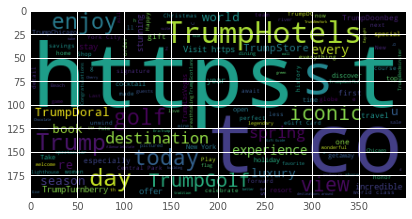

In [18]:
allwords= ' '.join([i for i in df['Tweets']])
cloud=WordCloud(width=400,height=200,max_font_size=100,random_state=None,background_color='black').generate(allwords)
plt.imshow(cloud)
plt.show()

In [13]:
# Create a function to compute +ve.-ve and neutral
def GetAnalysis(score):
    if score<0:
        return 'Negative'
    elif score>0:
        return 'Positive'
    else:
        return 'Neutral'
    
df['Analysis'] = df['polarity'].apply(GetAnalysis)

In [14]:
df

,Tweets,subjectivity,polarity,Analysis
0,Find Dad s favorite gift on TrumpStore s Fath...,0.533333,0.250000,Positive
1,Celebrate the Stars and Stripes with TrumpHot...,0.750000,0.200000,Positive
2,Pairing NationalRos Day with the perfect acce...,0.775000,0.675000,Positive
3,We ll never tire of TrumpTurnberry s legendar...,1.000000,1.000000,Positive
4,TrumpHotels Don t miss out on our next offer ...,0.000000,0.050000,Positive
...,...,...,...,...
95,TrumpGolf Hosting the Great One WayneGretzky...,0.472222,0.377778,Positive
96,Last chance to take advantage of the Suitest D...,0.283333,0.200000,Positive
97,Bring the World of Trump home with you this Ch...,0.500000,0.400000,Positive
98,TrumpHotels Don t miss out on a legendary gol...,0.796296,0.500000,Positive


In [15]:
df['Analysis'].value_counts()

Positive    85
Neutral     11
Negative     4
Name: Analysis, dtype: int64

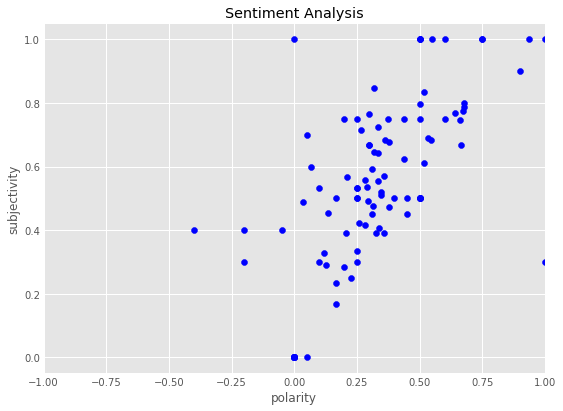

In [16]:
# Data visualization
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['polarity'][i],df['subjectivity'][i],color='blue')

plt.title('Sentiment Analysis')
plt.xlim(-1,1)
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()
